### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Summer 2021 ###

# Portfolio Selection

#### Students : Dongwook Cha (dcha6@wisc.edu), Hyun Ko (hko26@wisc.edu)

## Table of Contents

1. [Introduction](#1.-Introduction)
2. [Mathematical Model](#2.-Mathematical-model)
3. [Solution](#3.-Solution)
4. [Results and Discussion](#4.-Results-and-discussion)
5. [Conclusion](#5.-Conclusion)

## 1. Introduction

A fundamental problem from the investor perspective is to decide, in an efficient way, how to allocate an initial wealth among different classes of assets or securities. This problem is known as __portfolio selection__ and it is of utmost importance in finance.

In 1952, Harry Markowitz developed a mean-variance optimization model (a.k.a., the _Markowitz model_) for the selection of portfolios of securities. It is worth mentioning that H. Markowitz is the cowinner (with Merton Miller and William Sharpe) of the 1990 Nobel Prize of Economics because of the development of portfolio theory.

In a nutshell, the model consists of finding an optimal allocation of resources that guarantees a certain level of expected returns while minimizing the portfolio risk. There is an interesting trade-off between expected returns (desirable) and risks (undesirable). Since every investor has a different aversion to risk, there is no one-size-fits-all portfolio for every investor. Indeed, one can build an efficient frontier of portfolios for different levels of risks. 

This kind of model is routinely used by financial institutions to offer investment portfolios to its clients taking into account their risk aversion. The client's risk aversion profile is usually accessed through a questionaire. In our presentation we make some assumptions to simplify the problem. For instance, we do not consider transaction costs. Moreover, we solve a quite small problem considering only 4 classes of securities in order to make it easier to present our findings. However, the same code developed in this Notebook can be used to solve much larger problems.

In section 2, we present the Markowitz model. Our presentation closely follows the book `Optimization methods in finance` from Gerard Cornuejols, Javier pena, and Reha Tutuncu (1st and 2nd editions). In section 3, we solve the optimization problem. Real data is used to estimate the optimization input data for some classes of assets. In section 4, we present the results and discuss some limitations of this model. A key limitation is related to the high sensitivity of the optimal solution with respect to small changes in the problem data. In section 5, the conclusion is presented and we indicate two approaches to deal with the limitation pointed in section 4. 


## 2. Mathematical model

### 2.A The Markowitz model

* Consider assets $S_1, \dots, S_n\; (n\geq 2)$ with random returns $R_1, \dots, R_n$.

* A portfolio $\Pi = \left[x_1, \dots, x_n \right]^T$ is just a vector in $\mathbb{R}^n$ that specifies the percentage of the initial wealth to be invested in each asset.

* Naturally, with regards to the expected return of the portfolio, the higher the better.

* In contrast, risk is something that people is usually only willing to take if there is a compensation.

* So, there is a trade-off between expected returns (desirable) and risks (undesirable).

* How the expected return and the risk of a portfolio are measured in the Markowitz model?

### 2.A.1 The portfolio's expected return

* Let $\mu_i$ denote the expected return of asset $S_i$

> $\mu_i = \mathbb{E}\left[R_i\right]$, for $i = 1, \dots, n$.

* It turns our that the portfolio random return $R_{\Pi}$ can be written as:

$$R_{\Pi} = \sum_{i=1}^n R_i x_i.$$

* Therefore, the expected return of the portfolio $\Pi$ is given by:

$$\mu_{\Pi} = \mathbb{E}\left[\sum_{i=1}^n R_i x_i\right] =  \sum_{i=1}^n \mu_i x_i = \mu^T \cdot x$$


### 2.A.2 The portfolio's risk

* In the Markowitz model the variance is used to measure the portfolio's risk.

* The covariance between the random returns $R_i$ and $R_j$ is denoted by $\sigma_{ij}$ and is defined by:

$$\sigma_{ij} = \mathbb{E}\left[\left(R_i - \mu_i\right)\left(R_j - \mu_j\right)\right]$$

* The variance of the return $R_i$ is denoted by $\sigma^2_i$ and is just equal to $\sigma_{ii}$:

$$\sigma_{i}^2 = \mathbb{E}\left(R_i - \mu_i\right)^2$$

* The volatility or standard deviation of the return $R_i$ is denoted by $\sigma_i$ and is defined as:

$$\sigma_i = \sqrt{\sigma_i^2}$$

* Let $\Sigma = \left[ \sigma_{ij} : 1 \leq i, j \leq n \right]$ be the covariance matrix of the returns of the assets $S_1, \dots, S_n$.

* It can be shown that the portfolio's variance $\sigma^2_\Pi$ is equal to:

$$\sigma_\Pi^2 = x^T \Sigma x = \sum_{i=1}^n\sum_{j=1}^n \sigma_{ij}  x_i  x_j.$$

* Since the variance is always a non-negative number, it follows that $x^T \Sigma x \geq 0$, for all $x \in \mathbb{R}^n$.

* In other words, a covariance matrix is always __positive semidefinite__.

* This is of crucial importance from the optimization perspective, since minimizing a convex quadratic under linear constraints is a convex problem (therefore, it is much easier to solve compared to the minimization of nonquadratic functions). 

### 2.A.3 The optimization problem

* Given a desirable level $R$ of expected return, the mean-variance optimization problem can be formulated as follows:

$$\begin{array}{rrcl}
 \min & x^T\Sigma x \\
 \mbox{s.t.} & \mu^T x & \geq & R \\
             & Ax & = & b \\ 
             & Cx & \geq & d  
\end{array}$$

* The problem consists of minimizing the portfolio variance that guarantees a minimal amount $R$ of expected return.

* As discussed above, this is a convex quadratic optimization problem that can be solved efficiently.

* The other linear equalities and inequalities constraints are commonly used to specify:
    - Full investment constraint ($\sum_{i=1}^n x_i = 1$)
    - Leverage constraints such as long-only ($x_i \geq 0$) or 130/30 constraints ($-0.3 \leq x_i \leq 1.3$)
    - Upper and/or lower bounds on the size of individual positions ($l_i \leq x_i \leq u_i$).
    - Upper and/or lower bounds on exposure to industries or sectors ($l_i \leq \sum_{i \in \mbox{tech_industry}} x_i \leq u_i$)
    
### 2.A.4 The efficient frontier

* Changing the parameter $R$, we obtain a family of mean-variance optimization problems whose solution has standard deviation $\sigma(R) = \sqrt{\sigma^2(R)}$ and expected-return $\mu(R)$.

* The curve $R \mapsto (\sigma\left(R\right), \mu\left(R\right))$ is denoted as the efficient frontier.

* The portfolios that lie on the efficient frontier curve are called efficient and satisfy the following condition:

    - Every portfolio $\Pi$ such that $\sigma_{\Pi} < \sigma(R)$ must also have $\mu_{\Pi} < \mu(R)$.
    
    - In other words, if a portfolio $\Pi$ is such that $\mu_{\Pi} \geq \mu(R)$, then $\sigma_{\Pi} \geq \sigma(R)$.
    

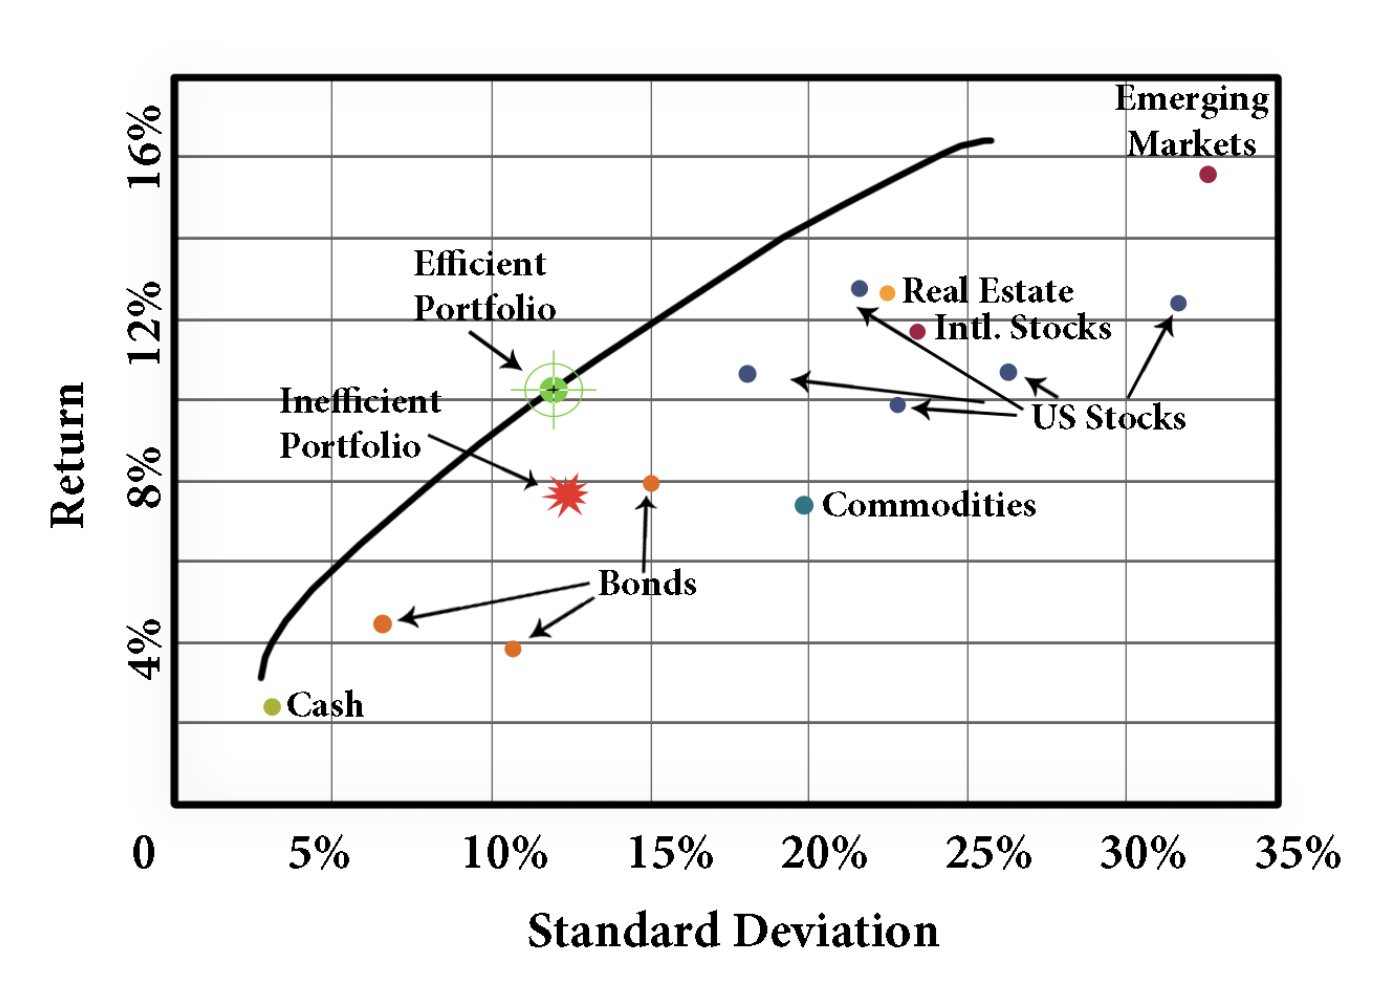
Image source: http://www.warrenwardassociates.com/blog/efficient-frontier

## 3. Solution


Importing the necessary packages

In [1]:
using JuMP
using Ipopt
using DataFrames
using CSV
using Statistics
using LinearAlgebra
using PyPlot
using Random
using Distributions


### 3.A Problem data

* We extract the problem data from Example 8.1.1 of the book `Optimization methods in finance` from Gerard Cornuejols and Reha Tutuncu (1st edition).

* We have compiled the index values from 1960 to 2003 of the `S&P500`, `10-year Treasury` bond, a `money market` account, and the `NASDAQ`.

Reading the data

In [2]:
data_df = CSV.read("./portfolio.csv", DataFrame)
first(data_df, 5)


,Year,SP500,T10Y,MM,NASDAQ
,Int64,Float64,Float64,Float64,Float64
1,1960,20.2553,262.935,100.0,34.461
2,1961,25.686,268.73,102.33,45.373
3,1962,23.4297,284.09,105.33,38.556
4,1963,28.7463,289.162,108.89,46.439
5,1964,33.4484,299.894,113.08,57.175


Annual returns

* Firstly, we calculate the annual returns using the formula:

$$r_{it} = \dfrac{I_{i,t} - I_{i, t-1}}{I_{i, t-1}},$$
&nbsp;&nbsp;&nbsp;&nbsp;where $I_{i,t}$ is the $i$th index value for year $t$. 

In [3]:
securities = [:SP500, :T10Y, :MM, :NASDAQ]
returns_df = (
    (data_df[2:end, securities] .- data_df[1:end-1, securities]) ./
    data_df[1:end-1, securities]
)
first(returns_df, 5)


,SP500,T10Y,MM,NASDAQ
,Float64,Float64,Float64,Float64
1,0.268113,0.0220397,0.0233,0.316648
2,-0.0878416,0.0571577,0.0293169,-0.150244
3,0.226917,0.0178535,0.0337985,0.204456
4,0.163572,0.0371141,0.0384792,0.231185
5,0.12356,0.00933997,0.0432437,0.171526


Expected returns

* We use the historical data to estimate the vector $\mu$ of expected returns.

$$\mu_i = \dfrac{1}{T} \sum_{i=1}^T r_{it}.$$


In [4]:
μ = reshape(mean(Array(returns_df), dims=1), length(securities))


4-element Vector{Float64}:
 0.12057065416494166
 0.0785024963787466
 0.06323029342969778
 0.12899098246658253

The covariance matrix

* We compute the covariance matrix using the `cov` function of the Statistics library.

In [5]:
Σ = Statistics.cov(Array(returns_df), corrected=false)


4×4 Matrix{Float64}:
 0.027782      0.00386556    0.000207034   0.0349091
 0.00386556    0.0111214    -0.000195289  -0.000543204
 0.000207034  -0.000195289   0.001154     -0.000428918
 0.0349091    -0.000543204  -0.000428918   0.0634345

The volatility or standard deviation of each asset class is:

In [6]:
volatility = LinearAlgebra.diag(Σ).^0.5


4-element Vector{Float64}:
 0.16667939081517577
 0.105458007874146
 0.033970518635092636
 0.25186212680055975

### 3.B Writing the optimization model in JuMP

* Let's begin by writing the optimization model in JuMP with a desirable expected return $R = 7.85\%$.


$$\begin{array}{rl}
    \min & x^T\Sigma x \\
    \mbox{s.t.} & \sum _{i=1}^4 x_i = 1 \\
                & \sum _{i=1}^4 \mu_{i} x_i \geq R \\
                & x_{1} \geq 0, x_{2} \geq 0, x_{3} \geq 0, x_{4} \geq 0
\end{array}$$

* Note that $R = 7.85\%$ is also the expected return of the 10-year Treasury bond.

* So, it will be interesting to compare the optimal portfolio volatility for this level of expected return with the 10-year Treasury bond volatility.


In [7]:
R = 0.0785
n = length(securities)
model = Model(Ipopt.Optimizer)
set_silent(model)
@variable(model, x[1:n] >= 0)
@objective(model, Min, x' * Σ * x)
@constraints(model, begin
        expected_return, μ' * x >= R
        full_investment, sum(x) == 1
    end)
println(model)


Min 0.027782019322518097 x[1]² + 0.0077311106162175685 x[2]*x[1] + 0.0004140680653361496 x[3]*x[1] + 0.06981816345060579 x[4]*x[1] + 0.011121391424783439 x[2]² - 0.00039057798508176374 x[3]*x[2] - 0.0010864073779530492 x[4]*x[2] + 0.0011539961363371762 x[3]² - 0.0008578358079718643 x[4]*x[3] + 0.06343453091650122 x[4]²
Subject to
 full_investment : x[1] + x[2] + x[3] + x[4] = 1.0
 expected_return : 0.12057065416494166 x[1] + 0.0785024963787466 x[2] + 0.06323029342969778 x[3] + 0.12899098246658253 x[4] ≥ 0.0785
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 x[4] ≥ 0.0



Solving the model

In [8]:
optimize!(model)
@show termination_status(model)
@show objective_value(model)
@show μ' * value.(x)
@show value.(x);



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

termination_status(model) = MathOptInterface.LOCALLY_SOLVED
objective_value(model) = 0.002399453010110897
μ' * value.(x) = 0.07850000137996523
value.(x) = [0.20052691891015992, 0.15798791613112245, 0.6208254275977232, 0.02065973736099451]


* The minimum variance portfolio with 7.85% expected return consists of:
    - 20.0% of S&P500
    - 15.8% of 10-year Treasury bond
    - 62.1% of the money market account
    - 2.1% of NASDAQ

* The optimal portfolio has a volatility (or standard deviation) of 4.89%

In [9]:
objective_value(model)^0.5


0.04898421184535786

* On the other hand, investing 100% on the 10-year Treasury bond yields also an expected return of 7.85%, but with a volatility of 10.5%!

* In other words, one can achieve the same level of expected return with a much lower volatility by diversifying the initial wealth among different assets.

### 3.C Building the efficient frontier

* Let's write a function that builds the efficient frontier.
* The function receives an array $Rs$ of expected returns levels as its argument.
* For each value of expected return level $R$, the function builds and solves the corresponding Markowitz model.
* The function returns a dictionary with the optimization problem results providing information about the portfolio expected return, volatility, and composition in the classes of assets.

In [10]:
function build_efficient_frontier(Rs)
    results = Dict(
        :μ => Float64[],
        :σ => Float64[],
        :SP500 => Float64[],
        :T10Y => Float64[],
        :MM => Float64[],
        :NASDAQ => Float64[]
    )
    n = length(securities)
    m = Model(Ipopt.Optimizer)
    set_silent(m)
    @variable(m, x[1:n] >= 0)
    @objective(m, Min, x' * Σ * x)
    @constraints(m, begin
            expected_return, μ' * x >= 0
            sum(x) == 1
        end)
    for r in Rs
        # Set the right-hand side of the expected return constraint to r
        set_normalized_rhs(expected_return, r)
        optimize!(m)
        if termination_status(m) == MOI.LOCALLY_SOLVED
            push!(results[:σ], objective_value(m)^0.5)
            push!(results[:μ], μ' * value.(x))
            sp500, t10y, mm, nasdaq = value.(x)
            push!(results[:SP500], sp500)
            push!(results[:T10Y], t10y)
            push!(results[:MM], mm)
            push!(results[:NASDAQ], nasdaq)
        end
    end
    return results
end


build_efficient_frontier (generic function with 1 method)

* We build a data frame with the optimization results.

In [11]:
cols_order = [:μ, :σ, :SP500, :T10Y, :MM, :NASDAQ]
Rs = range(0.065, 0.125; step=0.005)
efficient_frontier_df = DataFrame(
    build_efficient_frontier(Rs))[:, cols_order]


,μ,σ,SP500,T10Y,MM,NASDAQ
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0662853,0.0312733,3.26881e-6,0.104363,0.873417,0.0222171
2,0.07,0.0336883,0.0346706,0.135423,0.788643,0.0412633
3,0.075,0.0416136,0.132224,0.1487,0.689925,0.0291508
4,0.08,0.0524277,0.229794,0.16197,0.59121,0.0170252
5,0.085,0.064698,0.327325,0.175255,0.49249,0.00493032
6,0.09,0.0777437,0.415759,0.191798,0.392431,1.16503e-5
7,0.095,0.0912535,0.497966,0.210573,0.291458,4.06046e-6
8,0.1,0.10505,0.580164,0.22935,0.190483,3.35851e-6
9,0.105,0.119034,0.662363,0.248127,0.0895085,1.6751e-6


__Plotting the efficient frontier__

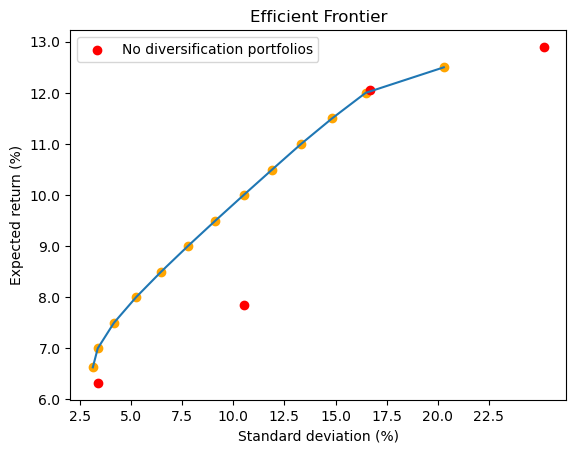

In [12]:
scatter(efficient_frontier_df[:, :σ], efficient_frontier_df[:, :μ], color="orange")
plot(efficient_frontier_df[:, :σ], efficient_frontier_df[:, :μ])
title("Efficient Frontier");
xlabel("Standard deviation (%)");
ylabel("Expected return (%)")
locs, vals = yticks()
yticks(locs, round.(100 .* locs, digits=1))
locs, vals = PyPlot.xticks()
xticks(locs, round.(100 .* locs, digits=1))
scatter(volatility, μ, color="red", label="No diversification portfolios")
legend();


__Plotting the composition of the optimal portfolios__

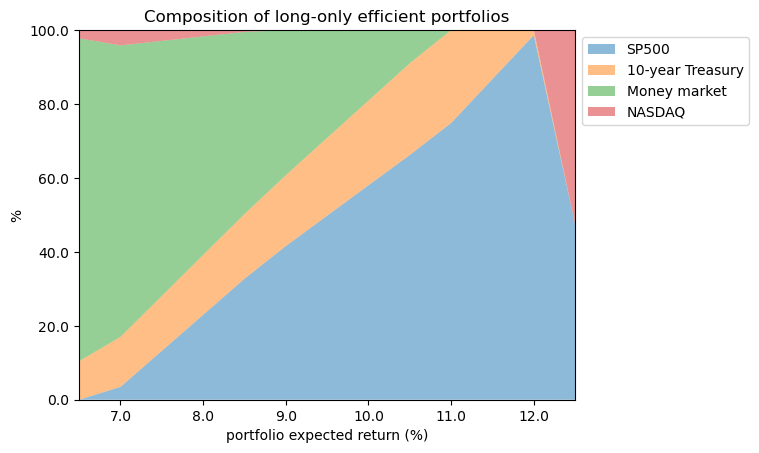

In [13]:
# Accumulate composition
portfolio_accumulate_composition = cumsum(Array(efficient_frontier_df[:, securities]), dims=2)
fill_between(x=Rs, y1=portfolio_accumulate_composition[:, 1], alpha=0.5, label="SP500")
fill_between(x=Rs, y1=portfolio_accumulate_composition[:, 2], y2=portfolio_accumulate_composition[:, 1], alpha=0.5, label="10-year Treasury")
fill_between(x=Rs, y1=portfolio_accumulate_composition[:, 3], y2=portfolio_accumulate_composition[:, 2], alpha=0.5, label="Money market")
fill_between(x=Rs, y1=portfolio_accumulate_composition[:, 4], y2=portfolio_accumulate_composition[:, 3], alpha=0.5, label="NASDAQ")
legend(loc="upper left", bbox_to_anchor=(1, 1))
xlabel("portfolio expected return (%)")
ylabel("%")
locs, vals = yticks()
yticks(locs, round.(100*locs; digits=0))
ylim((0, 1))
locs, vals = xticks()
xticks(locs, round.(100*locs; digits=1))
xlim((0.065, 0.125))
title("Composition of long-only efficient portfolios");


# 4. Results and discussion


__Results__

* As one increases the level of the desirable expected return $R$, the optimal portfolio composition moves from lower return asset classes such as the money market to higher return asset classes such as the SP500 and the NASDAQ.

* Even for a lower desirable expected return it is not optimal to allocate all the resources in the money market account. Indeed, one can decrease the portfolio volatility by diversifying the allocation including the 10-year Treasury bond and the NASDAQ in the portfolio.


__Limitations__

* In chapter 7 of the 2nd edition of the book `Optimization methods in finance`, the authors pointed out the high sensitivity of the Markowitz model to the input estimation $\left(\mu, \Sigma \right)$.

* Intuitively, the optimization procedure will try to take advantage of assets that apparently present a higher expected return by overweighting the holdings on those positions.

* Since there is inevitable noise in the parameter estimation of the input parameters, the higher expected return of an asset is frequently due to randomness.

* Moreover, small perturbations in the values of the inputs may lead to large swings in the composition portfolio.

* The authors also pointed that theoretical and empirical evidence indicates that the estimate of expected returns is more critical than the estimate of the covariance matrix.


__The efficient frontiers: true, estimated, and actual__

* To illustrate how this issue can affect the portfolio selection problem, we assume that the returns follow a multivariate normal distribution with known expected returns $\mu$ and covariance matrix $\Sigma$.

* Given $\mu$ and $\Sigma$ we can solve the Markowitz model for different values of returns and build the `true efficient frontier`.

* Then, we draw a random sample with $N$ observations from the true distribution and use it to estimate these parameters.

* We solve the Markowitz model with the estimated parameters and build the estimated efficient frontier.

* Using the estimated parameters, we consider the portfolio composition for different values of return and build the actual efficient frontier using the true parameters. 

__The true parameters__

* Suppose we have 4 assets with the following expected return $\mu_{true}$

In [14]:
μ_true = [0.11; 0.1; 0.05; 0.07]


4-element Vector{Float64}:
 0.11
 0.1
 0.05
 0.07

*  And covariance matrix $\Sigma_{true}$

In [15]:
Σ_true = [
    0.250 0.225 0.045 0.;
    0.225 0.25 0.045 0.;
    0.045 0.045 0.090 0.;
    0. 0. 0. 0.1
]


4×4 Matrix{Float64}:
 0.25   0.225  0.045  0.0
 0.225  0.25   0.045  0.0
 0.045  0.045  0.09   0.0
 0.0    0.0    0.0    0.1

* Let's build the `true efficient frontier`.

__Refactoring the `build_efficient_frontier` function__

* We do a small refactoring of the `build_efficient_frontier` function.

In [16]:
function build_efficient_frontier(Rs, μ, Σ)
    results = Dict(
        :μ => Float64[],
        :σ => Float64[],
        :x => zeros(length(Rs), length(μ)),
    )
    n = length(μ)
    m = Model(Ipopt.Optimizer)
    set_silent(m)
    @variable(m, x[1:n] >= 0)
    @objective(m, Min, x' * Σ * x)
    @constraints(m, begin
            expected_return, μ' * x >= 0
            sum(x) == 1
        end)
    for (k, r) in enumerate(Rs)
        set_normalized_rhs(expected_return, r)
        optimize!(m)
        if termination_status(m) == MOI.LOCALLY_SOLVED
            push!(results[:σ], objective_value(m)^0.5)
            push!(results[:μ], μ' * value.(x))
            results[:x][k, :] = value.(x)
        end
    end
    return results
end


build_efficient_frontier (generic function with 2 methods)

__The true efficient frontier__

In [17]:
Rs = 0.065:0.005:0.11


0.065:0.005:0.11

In [18]:
frontier_true = build_efficient_frontier(
    Rs, μ_true, Σ_true)
efficient_frontier_true_df = [DataFrame(
    :μ => frontier_true[:μ],
    :σ => frontier_true[:σ]) DataFrame(frontier_true[:x], :auto)]


,μ,σ,x1,x2,x3,x4
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0650001,0.211898,0.0578826,0.0505743,0.441623,0.44992
2,0.07,0.216156,0.159828,0.0213118,0.351625,0.467235
3,0.075,0.227661,0.255176,1.18999e-6,0.260355,0.484467
4,0.08,0.245514,0.33284,2.42408e-7,0.165681,0.501479
5,0.085,0.268493,0.410503,3.88402e-7,0.0710061,0.518491
6,0.09,0.295804,0.5,6.27419e-8,3.55366e-8,0.5
7,0.095,0.334243,0.625,1.16084e-7,2.1798e-8,0.375
8,0.1,0.383243,0.75,5.76628e-8,5.50217e-9,0.25
9,0.105,0.439282,0.875,3.76721e-8,5.67214e-10,0.125


__The multivariate normal distribution__

* A random vector $X$ has multivariate normal distribution with parameters $\mu \in \mathbb{R}^n$ and $\Sigma \in \mathbb{R}^{n \times n}$ if its probability density function is given by:

$$f(x) = \dfrac{1}{2\pi^{k/2}\det\left(\Sigma\right)^{1/2}}\exp^{-\frac{1}{2}\left(x - \mu\right)^T\Sigma^{-1}\left(x - \mu\right)}, \;\forall x \in \mathbb{R}^n$$

* Let's generate a random sample of multivariate normal vector in Julia.

* Firstly, we can define an instance of this distribution using the `MvNormal` constructor from the Distributions library.

In [19]:
gaussian = Distributions.MvNormal(μ_true, Σ_true)


FullNormal(
dim: 4
μ: [0.11, 0.1, 0.05, 0.07]
Σ: [0.25 0.225 0.045 0.0; 0.225 0.25 0.045 0.0; 0.045 0.045 0.09 0.0; 0.0 0.0 0.0 0.1]
)


In [20]:
@show mean(gaussian)
@show cov(gaussian);


mean(gaussian) = [0.11, 0.1, 0.05, 0.07]
cov(gaussian) = [0.25 0.225 0.045 0.0; 0.225 0.25 0.045 0.0; 0.045 0.045 0.09 0.0; 0.0 0.0 0.0 0.1]


__Generating a random sample__

* We use the `rand` function for generating a random sample.

* We pass the distribution as the first argument.

* Let's fix the random seed for reproducibility.

In [21]:
Random.seed!(2021)
N = 100
sample = reshape(vcat(Random.rand(gaussian, (N,))...), (length(gaussian), N))'


100×4 adjoint(::Matrix{Float64}) with eltype Float64:
  0.368327    0.314933   -0.126227     0.110542
 -0.350454   -0.278398    0.525155     0.137183
 -0.0717677  -0.123058   -0.00687438   0.222538
 -0.41492    -0.0814233   0.301069    -0.144562
  0.0802525   0.0682188   0.0545988    0.482291
  0.191284    0.406455   -0.294296    -0.13743
  0.068227   -0.0214639   0.301784     0.480518
 -1.08871    -1.34289     0.0603689   -0.434921
 -0.567203   -0.611214    0.0667243    0.0324446
 -0.378633   -0.0628229  -0.0877596    0.159616
 -0.163056   -0.170046    0.231409    -0.0553153
 -0.43938    -0.417201    0.0644981   -0.506569
  0.567124    0.170892   -0.0511154    0.00319048
  ⋮                                   
  0.305858    0.299359   -0.227913     0.142264
  0.19986     0.358291    0.0986116    0.287306
  0.0297976  -0.238022   -0.171908     0.157008
  0.568424    0.333628    0.69173      0.0968119
  0.362215    0.163427    0.019062    -0.288056
 -0.534003   -0.207625    0.120366    -

__Estimating the sample mean and covariance matrix__


In [22]:
μ_hat = [Statistics.mean(sample, dims=1)...]
@show μ_hat;


μ_hat = [0.1291313139482091, 0.11013253906629092, 0.09594130241239811, 0.06272824097776686]


* Due to randomness and noise in the estimation process, the estimated expected returns of the first 3 asset classes are above their true values.

* This will shift the estimated efficient frontier upwards and the estimated efficient portfolios will tend to give less weight to the 4th asset.

In [23]:
Σ_hat = Statistics.cov(sample)


4×4 Matrix{Float64}:
 0.288188   0.26669     0.0185729    0.0298589
 0.26669    0.296824    0.0291661    0.0239063
 0.0185729  0.0291661   0.0924501   -0.00175321
 0.0298589  0.0239063  -0.00175321   0.0901037

__The estimated efficient frontier__



In [24]:
Rs_hat = minimum(μ_hat):0.005:maximum(μ_hat)
frontier_hat = build_efficient_frontier(
    Rs_hat, μ_hat, Σ_hat)
efficient_frontier_hat_df = [DataFrame(
    :μ => frontier_hat[:μ],
    :σ => frontier_hat[:σ]) DataFrame(frontier_hat[:x], :auto)]


,μ,σ,x1,x2,x3,x4
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0828785,0.208033,0.0721464,2.39489e-6,0.462451,0.4654
2,0.0828785,0.208033,0.0721464,2.4004e-6,0.462451,0.4654
3,0.0828785,0.208033,0.0721464,2.39241e-6,0.462451,0.4654
4,0.0828785,0.208033,0.0721464,2.40614e-6,0.462451,0.4654
5,0.0828786,0.208033,0.0721484,7.88807e-7,0.462452,0.465399
6,0.0877282,0.211656,0.129642,1.93739e-7,0.493522,0.376836
7,0.0927282,0.222598,0.188917,2.04824e-7,0.525555,0.285527
8,0.0977282,0.239862,0.248193,8.76141e-8,0.557589,0.194219
9,0.102728,0.262203,0.307468,5.7458e-8,0.589622,0.10291


__The actual efficient frontier__

* For each level of expected return, consider the optimal portfolio composition given by solving the Markowitz model with the estimated data.

* Since we know the true values for $\mu$ and $\Sigma$, it is possible to calculate the true expected returns and volatitily for these portfolios.

In [25]:
efficient_frontier_actual_df = copy(efficient_frontier_hat_df)
efficient_frontier_actual_df[:, :μ] = (
    Array(efficient_frontier_hat_df)[:, 3:end]
        * μ_true)
var_actual = diag(
    Array(efficient_frontier_hat_df)[:, 3:end]
        * Σ_true
            * Array(efficient_frontier_hat_df)[:, 3:end]')
efficient_frontier_actual_df[:, :σ] = var_actual.^0.5
efficient_frontier_actual_df


,μ,σ,x1,x2,x3,x4
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0636369,0.21263,0.0721464,2.39489e-6,0.462451,0.4654
2,0.0636369,0.21263,0.0721464,2.4004e-6,0.462451,0.4654
3,0.0636369,0.21263,0.0721464,2.39241e-6,0.462451,0.4654
4,0.0636369,0.21263,0.0721464,2.40614e-6,0.462451,0.4654
5,0.0636369,0.21263,0.0721484,7.88807e-7,0.462452,0.465399
6,0.0653152,0.214666,0.129642,1.93739e-7,0.493522,0.376836
7,0.0670456,0.225543,0.188917,2.04824e-7,0.525555,0.285527
8,0.0687759,0.244149,0.248193,8.76141e-8,0.557589,0.194219
9,0.0705063,0.268883,0.307468,5.7458e-8,0.589622,0.10291


__Plotting the efficient frontiers__

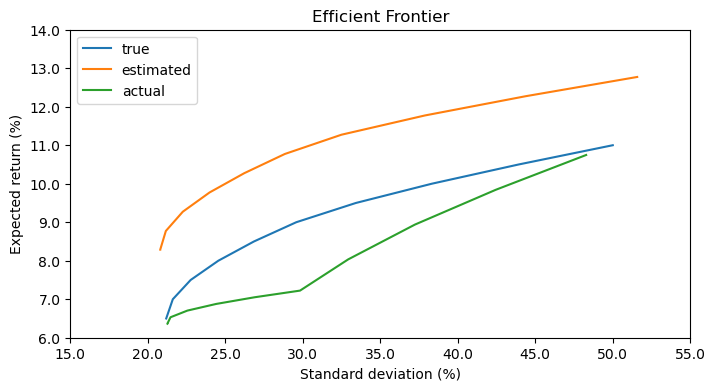

In [26]:
figure(figsize=(8,4))
plot(efficient_frontier_true_df[:, :σ], efficient_frontier_true_df[:, :μ], label="true")
plot(efficient_frontier_hat_df[:, :σ], efficient_frontier_hat_df[:, :μ], label="estimated")
plot(efficient_frontier_actual_df[:, :σ], efficient_frontier_actual_df[:, :μ], label="actual")
title("Efficient Frontier")
xlabel("Standard deviation (%)")
ylabel("Expected return (%)")
locs, vals = yticks()
yticks(locs, round.(100 .* locs, digits=1))
locs, vals = xticks()
xticks(locs, round.(100 .* locs, digits=1))
legend();


* The estimated efficient frontier is far above the true efficient frontier.

* Indeed, due to randomness, the estimated expected returns of all but the last asset were above their true values.

* As a result the future portfolio performance should be far below what the model is predicting.

* The actual frontier is below the true efficient frontier which means that the estimated portfolios are not efficient.

# 5. Conclusion

* We have seen how one can solve a family of quadratic optimization problems to build the efficient frontier.

* This solves a fundamental financial problem known as portfolio selection.

* However, one should be careful before applying this model to make investment decisions.

* Indeed, one drawback of this approach is the high sensitivity of the Markowitz problem with regards to the estimation of the input data.

* There are many ways to address this issue including financial approaches and optimization approaches. Here, we briefly discuss 2 optimization approaches. 

* One possible direction for future investigation is to apply robust optimization to consider uncertainty sets for the parameters $\mu$ and/or $\Sigma$. 
    - In this case, one considers a min-max problem where the maximization problem is with respect to the problem data $\mu$ and/or $\Sigma$ belonging to the uncertainty sets.
    - See chapter 19 of the 2nd edition of the book `Optimization methods in finance` for a reference on this topic.

* Another possible direction for future investigation is to minimize other risk measures instead of the variance.

    - Indeed, Rockafellar T. and S. Uryasev have proposed the minimization of the conditional value-at-risk (CV@R) following the stochastic programming approach.
    
    - It turns out that, after a clever trick, the minimization of the CV@R risk-measure can be written as a linear programming problem when there is a finite number of scenarios (finite sample).
    
    - The reference is `Rockafellar, T. and S. Uryasev (2000). Optimization of conditional value-at-risk. Journal of Risk, 2:21-41`.